In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import qqplot,add_constant
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from matplotlib import gridspec
from sklearn.metrics import confusion_matrix
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_curve,auc
import seaborn as sns

%matplotlib inline

#경고문구 무시
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rc('font',family='Malgun Gothic')

# 의사결정 나무

In [2]:
df=pd.read_csv('유방암.csv',engine='python',encoding='949')

In [3]:
df.isnull().sum()

#결측치는 없다.

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [4]:
df_y=df['diagnosis']
df_x=df.drop('diagnosis',axis=1,inplace=False)
df_train_x,df_test2_x,df_train_y,df_test2_y=train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_vaild_x,df_test_x,df_vaild_y,df_test_y=train_test_split(df_test2_x,df_test2_y,test_size=0.5,random_state=1234)
tree_un=DecisionTreeClassifier(random_state=1234)
tree_un.fit(df_train_x,df_train_y)
print('accuracy on training set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('accuracy on vaild set:{:.3f}'.format(tree_un.score(df_vaild_x,df_vaild_y)))

#기본 모델을 구현해본 결과 나쁘지않은 결과가 나왔지만 train에 과적합 되어있다.

accuracy on training set:1.000
accuracy on vaild set:0.895


,depth,TrainScore,vaildScore
0,1,0.943,0.895
1,2,0.965,0.930
2,3,0.987,0.942
3,4,1.000,0.895
4,5,1.000,0.895
5,6,1.000,0.895
6,7,1.000,0.895
7,8,1.000,0.895
8,9,1.000,0.895
9,10,1.000,0.895


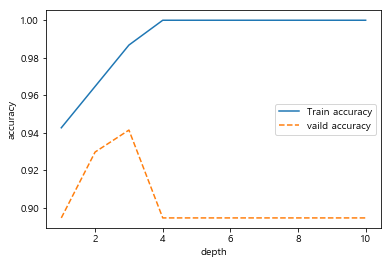

In [5]:
train_accuracy=[]
vaild_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    vaild_accuracy.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['vaildScore']=vaild_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,vaild_accuracy,linestyle='--',label='vaild accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()

# score가 가장 높으며 depth 수가 적은 4를 선택한다. depth가 크면 과적합이 될 가능성이 있다.

,split,TrainScore,vaildScore
0,10,0.965,0.930
1,20,0.965,0.930
2,30,0.965,0.930
3,40,0.965,0.930
4,50,0.965,0.930
5,60,0.965,0.930
6,70,0.965,0.930
7,80,0.965,0.930
8,90,0.947,0.906
9,100,0.947,0.906


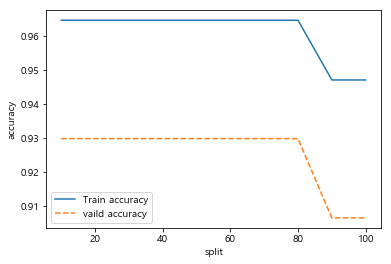

In [6]:
train_accuracy=[]
vaild_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split,max_depth=4,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    vaild_accuracy.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['vaildScore']=vaild_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,vaild_accuracy,linestyle='--',label='vaild accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()

# validscore가 가장 높으며 split값이 큰 80을 선택한다. split가 작으면 leaf값도 작아질 우려가 있다.
# leaf 값이 작아지면 과적합의 가능성이 있다.

,leaf,TrainScore,vaildScore
0,10,0.952,0.906
1,20,0.943,0.895
2,30,0.943,0.895
3,40,0.943,0.895
4,50,0.943,0.895
5,60,0.943,0.895
6,70,0.943,0.895
7,80,0.943,0.895
8,90,0.938,0.901
9,100,0.903,0.865


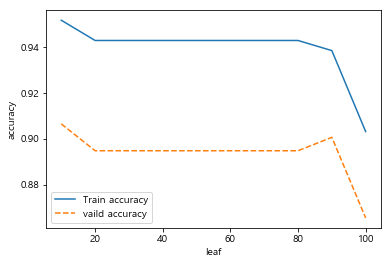

In [7]:
train_accuracy=[]
vaild_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=80,\
                                max_depth=4,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    vaild_accuracy.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['vaildScore']=vaild_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,vaild_accuracy,linestyle='--',label='vaild accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

# validscore가 가장 높은 값을 선택한다.

In [8]:
#최종모델 조건
tree_final=DecisionTreeClassifier(random_state=1234,min_samples_leaf=10 ,min_samples_split=80,\
                                  max_depth=4)
tree_final.fit(df_train_x,df_train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=80,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

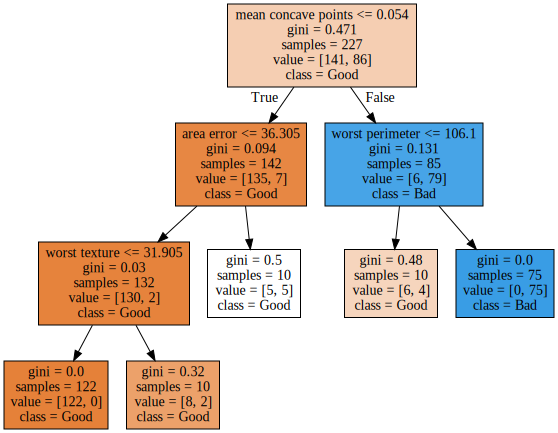

In [9]:
# 최종모델 그래프
v_feature_names=df_train_x.columns

export_graphviz(tree_final,out_file='tree_final.dot',class_names=['Good','Bad'],\
               feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_final.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))
# mean concave points <= 0.054 ,area error <= 36.305,  worst texture <= 31.905 모든 조건을 만족할 때 불순도가 0 이다.  즉 암 환자를 암환자로 판단하는 경우가 위에 조건과 같다.
# mean concave points >= 0.054 , worst perimeter >= 106.1 일때 암환자가 아닌 경우 암 환자가 아니라고 판단한 것이다.

In [10]:
y_pred=tree_final.predict(df_test_x)

print('accuracy on train set:{:.3f}'.format(tree_final.score(df_train_x,df_train_y)))
print('accuracy on vaild set:{:.3f}'.format(tree_final.score(df_vaild_x,df_vaild_y)))
print('accuracy on test set:{:.3f}'.format(tree_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

#최종모델이 test데이터를 0.8이상 설명력을 가진다. 충분히 좋은 모델이 구현되었다.

accuracy on train set:0.952
accuracy on vaild set:0.906
accuracy on test set:0.883
confusion matrix:
[[97  5]
 [15 54]]


,feature,importance
7,mean concave points,0.878
22,worst perimeter,0.068
13,area error,0.047
21,worst texture,0.008
0,mean radius,0.000
16,concavity error,0.000
28,worst symmetry,0.000
27,worst concave points,0.000
26,worst concavity,0.000
25,worst compactness,0.000


Text(0,0.5,'변수')

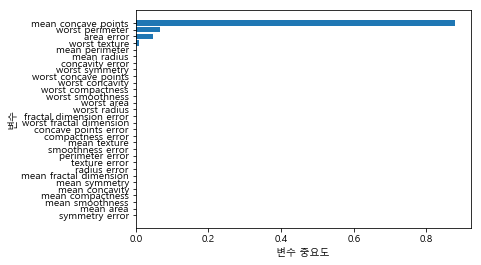

In [11]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=tree_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))



df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#변수의 중요도는 mean concave points ,worst perimeter ,area error ,worst texture 순이다. 
#암 진단을 할 때 가장 크게 고려해야 할 변수는 mean concave points 이다. 

# 랜덤포레스트

In [12]:
df=pd.read_csv('유방암.csv',engine='python',encoding='949')
df.isnull().sum()

#결측치는 없다.

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [13]:
df_y=df['diagnosis']
df_x=df.drop('diagnosis',axis=1,inplace=False)
df_train_x,df_test2_x,df_train_y,df_test2_y=train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_valid_x,df_test_x,df_valid_y,df_test_y=train_test_split(df_test2_x,df_test2_y,test_size=0.5,random_state=1234)
tree_un=RandomForestClassifier(random_state=1234)
tree_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('score on valid set:{:.3f}'.format(tree_un.score(df_valid_x,df_valid_y)))

#기본모델이 꽤 좋은 모델이 구현되었지만 train데이터에 과적합 되어있다.

score on training set:0.996
score on valid set:0.930


,n_estimator,TrainScore,validScore
0,10,0.996,0.930
1,20,1.000,0.947
2,30,1.000,0.930
3,40,1.000,0.936
4,50,1.000,0.936
5,60,1.000,0.947
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.947
9,100,1.000,0.947


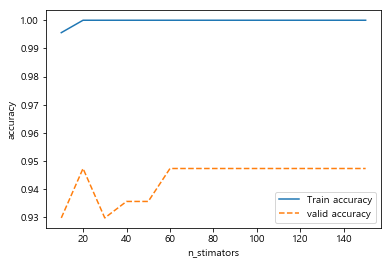

In [14]:
train_accuracy=[]
valid_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))
                      
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimator']=para_n_tree
df_accuracy_n['TrainScore']=train_accuracy
df_accuracy_n['validScore']=valid_accuracy

display(df_accuracy_n.round(3))

plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_n_tree, valid_accuracy, linestyle='--', label='valid accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_stimators')
plt.legend()

#validscore가 크고 n이 큰 n=60으로 선택한다.

Text(0.5,0,'oob n_estimator')

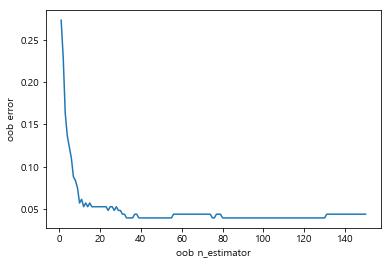

In [15]:
oob_error=[]

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator,oob_score=True,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1-rf.oob_score_)
    
    
    
    
plt.plot(range(1,151),oob_error)
plt.ylabel('oob error')
plt.xlabel('oob n_estimator')



,depth,TrainScore,validScore
0,1,0.943,0.924
1,2,0.974,0.930
2,3,0.982,0.930
3,4,0.991,0.936
4,5,0.996,0.942
5,6,1.000,0.942
6,7,1.000,0.942
7,8,1.000,0.947
8,9,1.000,0.947
9,10,1.000,0.947


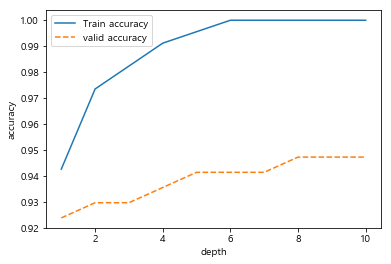

In [16]:
train_accuracy=[]
valid_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth=v_max_depth,n_estimators=60,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['validScore']=valid_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,valid_accuracy,linestyle='--',label='valid accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()

#3번째로 높은 dpeth=4선택한다.validscore가 가장 큰 것은 과적합 가능성이 높기 때문이다.

,split,TrainScore,validScore
0,10,0.987,0.936
1,20,0.982,0.936
2,30,0.978,0.936
3,40,0.978,0.936
4,50,0.974,0.936
5,60,0.978,0.930
6,70,0.978,0.942
7,80,0.978,0.942
8,90,0.974,0.942
9,100,0.960,0.942


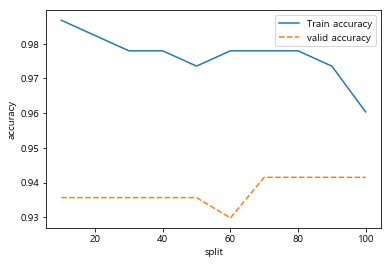

In [17]:
train_accuracy=[]
valid_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=4,n_estimators=60,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['validScore']=valid_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,valid_accuracy,linestyle='--',label='valid accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()
#split는 validscore가 가장 큰 70을 선택한다.

,leaf,TrainScore,TestScore
0,10,0.974,0.906
1,20,0.965,0.895
2,30,0.960,0.895
3,40,0.960,0.883
4,50,0.965,0.901
5,60,0.930,0.877
6,70,0.930,0.854
7,80,0.621,0.596
8,90,0.621,0.596
9,100,0.621,0.596


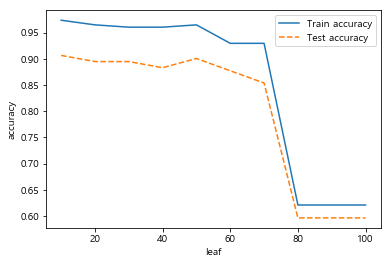

In [18]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(min_samples_split=70,min_samples_leaf=v_min_samples_leaf,\
                              max_depth=4,n_estimators=60,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

#leaf는 과적합을 방지하기위해 50을 선택한다.

In [19]:
rf_final=RandomForestClassifier(min_samples_split=70,min_samples_leaf=50,\
                              max_depth=4,n_estimators=60,random_state=1234)
rf_final.fit(df_train_x,df_train_y)
y_pred=rf_final.predict(df_test_x)
print('accuracy on trainig set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('accuracy on vaild set:{:.3f}'.format(rf_final.score(df_vaild_x,df_vaild_y)))
print('accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

#최종 모델이 test데이터를 0.9이상 설명가능하다. 좋은 모델이 구현되었다.

accuracy on trainig set:0.965
accuracy on vaild set:0.912
accuracy on test set:0.901
confusion matrix:
[[93  9]
 [ 8 61]]


,feature,importance
7,mean concave points,0.133
22,worst perimeter,0.133
20,worst radius,0.121
27,worst concave points,0.100
2,mean perimeter,0.083
6,mean concavity,0.083
0,mean radius,0.067
3,mean area,0.067
23,worst area,0.067
13,area error,0.067


Text(0,0.5,'변수')

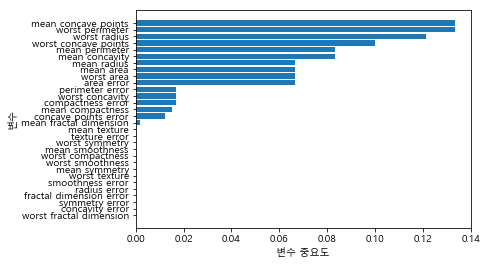

In [20]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=rf_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))



df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#변수의 중요도는 mean concave points,worst perimeter,worst radius,worst concave points 순이다.
#암 진단을 할 때  mean concave points,worst perimeter 변수를 가장 고려해야 한다.

# 그래디언트 부스팅

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
df=pd.read_csv('유방암.csv',engine='python',encoding='949')
print(df.isnull().sum())
from collections import Counter

list_v_char=list(df.select_dtypes(include='object').columns)
print(list_v_char)

#결측치는 없다.

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
[]


In [22]:
df_y=df['diagnosis']
df_x=df.drop('diagnosis',axis=1,inplace=False)
df_train_x,df_test2_x,df_train_y,df_test2_y=train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_valid_x,df_test_x,df_valid_y,df_test_y=train_test_split(df_test2_x,df_test2_y,test_size=0.5,random_state=1234)
rf_un=GradientBoostingClassifier(random_state=1234)
rf_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(rf_un.score(df_train_x,df_train_y)))
print('score on valid set:{:.3f}'.format(rf_un.score(df_valid_x,df_valid_y)))

#기본모델이 valid 데이터를 잘 설명하지만 train에 과적합되어 있다.

score on training set:1.000
score on valid set:0.942


,lr,TrainScore,vaildScore
0,0.1,1.0,0.942
1,0.2,1.0,0.936
2,0.3,1.0,0.936
3,0.4,1.0,0.953
4,0.5,1.0,0.936
5,0.6,1.0,0.930
6,0.7,1.0,0.930
7,0.8,1.0,0.947
8,0.9,1.0,0.936


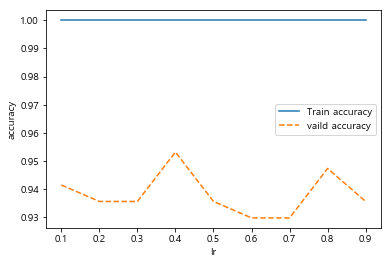

In [23]:
train_accuracy=[]
vaild_accuracy=[]
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate=v_learning_rate,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    vaild_accuracy.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['lr']=para_lr
df_accuracy_lr['TrainScore']=train_accuracy
df_accuracy_lr['vaildScore']=vaild_accuracy

display(df_accuracy_lr.round(3))

plt.plot(para_lr, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_lr,vaild_accuracy, linestyle='--', label='vaild accuracy')
plt.ylabel('accuracy')
plt.xlabel('lr')
plt.legend()

#과적합을 방지하기 위해 validscore가 세번째로 큰 lr=0.1 을 선택한다.

,n,TrainScore,validScore
0,10,0.991,0.942
1,20,0.996,0.942
2,30,1.000,0.942
3,40,1.000,0.942
4,50,1.000,0.942
5,60,1.000,0.942
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.942
9,100,1.000,0.942


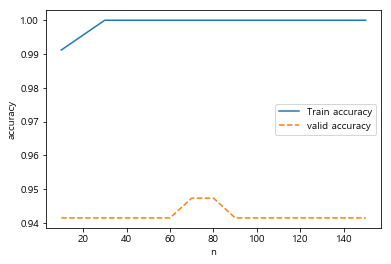

In [24]:
train_accuracy=[]
valid_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators=v_n_estimators,learning_rate=0.1,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))
                      
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n']=para_n_tree
df_accuracy_n['TrainScore']=train_accuracy
df_accuracy_n['validScore']=valid_accuracy

display(df_accuracy_n.round(3))

plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_n_tree,valid_accuracy, linestyle='--', label='valid accuracy')
plt.ylabel('accuracy')
plt.xlabel('n')
plt.legend()

#validscore가 가장 크고 n도 가장 큰 80을 선택한다.

,depth,TrainScore,validScore
0,1,0.996,0.947
1,2,1.000,0.936
2,3,1.000,0.947
3,4,1.000,0.924
4,5,1.000,0.924
5,6,1.000,0.924
6,7,1.000,0.924
7,8,1.000,0.924
8,9,1.000,0.924
9,10,1.000,0.924


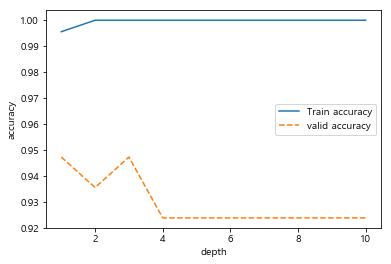

In [25]:
train_accuracy=[]
valid_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(max_depth=v_max_depth,n_estimators=80,learning_rate=0.1,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['validScore']=valid_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_depth,valid_accuracy, linestyle='--', label='valid accuracy')
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend()

#depth는 validscore가 가장 큰 3을 선택한다. 1을 선택하지 않은 이유는 그래프가 너무 단순화되어 
#과소적합이 될 수 있기 때문이다.

,split,TrainScore,validScore
0,2,1.0,0.947
1,3,1.0,0.942
2,4,1.0,0.942
3,5,1.0,0.947
4,6,1.0,0.947
5,7,1.0,0.936
6,8,1.0,0.936
7,9,1.0,0.936
8,10,1.0,0.942


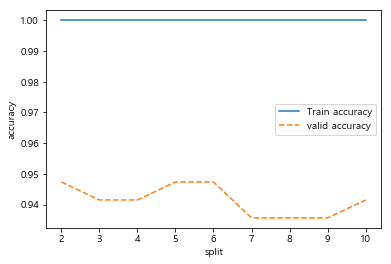

In [26]:
train_accuracy=[]
valid_accuracy=[]
para_split=[split for split in range(2,11)]

for v_min_samples_split in para_split:
    gb=GradientBoostingClassifier(min_samples_split=v_min_samples_split,max_depth=3,\
                                  n_estimators=80,learning_rate=0.1,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['validScore']=valid_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_split,valid_accuracy, linestyle='--', label='valid accuracy')
plt.ylabel('accuracy')
plt.xlabel('split')
plt.legend()

#split는 validscore가 가장 큰 6을 선택한다. split 너무 작으면 과적합이 될 수 있기 때문이다.

,leaf,TrainScore,validScore
0,10,1.000,0.942
1,20,1.000,0.953
2,30,1.000,0.959
3,40,1.000,0.959
4,50,1.000,0.965
5,60,0.996,0.965
6,70,0.996,0.965
7,80,0.991,0.959
8,90,0.987,0.942
9,100,0.978,0.942


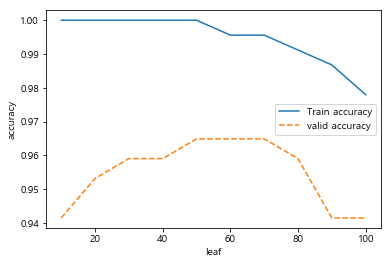

In [27]:
train_accuracy=[]
valid_accuracy=[]
para_leaf=[leaf*10 for leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=3,\
                                  n_estimators=80,learning_rate=0.1,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['validScore']=valid_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_leaf,valid_accuracy, linestyle='--', label='valid accuracy')
plt.ylabel('accuracy')
plt.xlabel('leaf')
plt.legend()

#validscore가 가장 크고 leaf=80도 큰 값을 선택한다.

In [28]:
#split 기준
gb_final1=GradientBoostingClassifier(min_samples_split=6,max_depth=3,\
                                  n_estimators=80,learning_rate=0.1,random_state=1234)
gb_final1.fit(df_train_x,df_train_y)
y_pred=gb_final1.predict(df_test_x)
print('accuracy on trainig set:{:.3f}'.format(gb_final1.score(df_train_x,df_train_y)))
print('accuracy on valid set:{:.3f}'.format(gb_final1.score(df_valid_x,df_valid_y)))
print('accuracy on test set:{:.3f}'.format(gb_final1.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))



accuracy on trainig set:1.000
accuracy on valid set:0.947
accuracy on test set:0.924
confusion matrix:
[[96  6]
 [ 7 62]]


In [30]:
#leaf 기준 
gb_final2=GradientBoostingClassifier(min_samples_leaf=80,max_depth=3,\
                                  n_estimators=80,learning_rate=0.1,random_state=1234)
gb_final2.fit(df_train_x,df_train_y)
y_pred=gb_final2.predict(df_test_x)
print('accuracy on trainig set:{:.3f}'.format(gb_final2.score(df_train_x,df_train_y)))
print('accuracy on valid set:{:.3f}'.format(gb_final2.score(df_valid_x,df_valid_y)))
print('accuracy on test set:{:.3f}'.format(gb_final2.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

# split는 leaf보다 커야 하기에 두 조건을 같이 사용할 수 없었다.
#따로 구현하여 test데이터의 설명력이 split가 0.924, leaf가 0.912가 나왔다.
# test의 설명력만 본다면 split가 더 좋아 보이지만 split로 구현한 모델은 train에 과적합되어있다.
# 그러므로 최종모델로 min_samples_leaf=80,max_depth=3,n_estimators=80,learning_rate=0.1을 선택한다.

accuracy on trainig set:0.991
accuracy on valid set:0.959
accuracy on test set:0.912
confusion matrix:
[[96  6]
 [ 9 60]]


,feature,importance
7,mean concave points,0.232
22,worst perimeter,0.203
21,worst texture,0.128
24,worst smoothness,0.075
15,compactness error,0.055
23,worst area,0.052
1,mean texture,0.046
27,worst concave points,0.040
5,mean compactness,0.035
20,worst radius,0.027


Text(0,0.5,'변수')

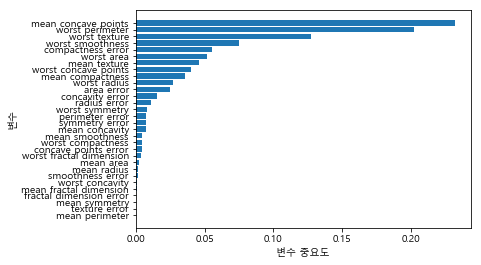

In [31]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=gb_final1.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))



df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#변수의 중요도는 mean concave points ,worst perimeter ,worst concave points,area error 순이다.
# 가장 중요한 변수는 mean concave points 이다.

# knn

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib import gridspec

df=pd.read_csv('유방암.csv',engine='python',encoding='949')
print(df.isnull().sum())
from collections import Counter

list_v_char=list(df.select_dtypes(include='object').columns)
print(list_v_char)

#결측치는 없다.

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
[]


In [33]:
df_y=df['diagnosis']
df_x=df.drop('diagnosis',axis=1,inplace=False)
df_train_x,df_test2_x,df_train_y,df_test2_y=train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_valid_x,df_test_x,df_valid_y,df_test_y=train_test_split(df_test2_x,df_test2_y,test_size=0.5,random_state=1234)
knn_un=KNeighborsClassifier()
knn_un.fit(df_train_x,df_train_y)
print('accuracy on training set:{:.3f}'.format(rf_un.score(df_train_x,df_train_y)))
print('accuracy on valid set:{:.3f}'.format(rf_un.score(df_valid_x,df_valid_y)))

#기본모델로 valid데이터의 설명력이 높은 모델이 구현되었지만 train에 과적합 되어있다.

accuracy on training set:1.000
accuracy on valid set:0.942


,n,Trainaccuracy,validaccuracy
0,1,1.000,0.901
1,2,0.956,0.895
2,3,0.960,0.918
3,4,0.947,0.901
4,5,0.943,0.947
5,6,0.947,0.930
6,7,0.938,0.936
7,8,0.943,0.942
8,9,0.938,0.936
9,10,0.934,0.936


Text(0.5,0,'n')

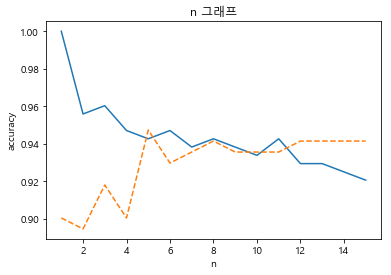

In [34]:
#n 최적 값 찾기
train_accuracy=[]; valid_accuracy=[]
para_n=[i for i in range(1,16)]
for v_n_neighbors in para_n:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    valid_accuracy.append(knn.score(df_valid_x,df_valid_y))

#n 스코어

df_accuracy_knn = pd.DataFrame()
df_accuracy_knn['n']=para_n
df_accuracy_knn['Trainaccuracy']=train_accuracy
df_accuracy_knn['validaccuracy']=valid_accuracy
display(df_accuracy_knn.round(3))

#n 그래프

plt.title('n 그래프')
plt.plot(para_n,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_n,valid_accuracy,linestyle='--',label='valid accuracy')
plt.ylabel('accuracy'); plt.xlabel('n')

# validscore가 가장 높은 n=5 를 잠정적으로 선택한다.

,neighbors,weight,Trainaccuracy,validaccuracy
0,1,uniform,1.000,0.901
1,2,uniform,0.956,0.895
2,3,uniform,0.960,0.918
3,4,uniform,0.947,0.901
4,5,uniform,0.943,0.947
5,6,uniform,0.947,0.930
6,7,uniform,0.938,0.936
7,8,uniform,0.943,0.942
8,9,uniform,0.938,0.936
9,10,uniform,0.934,0.936


,Trainaccuracy_distance,Trainaccuracy_uniform,validaccuracy_distance,validaccuracy_uniform
neighbors,,,,
1,1.0,1.000000,0.900585,0.900585
2,1.0,0.955947,0.900585,0.894737
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.947137,0.912281,0.900585
5,1.0,0.942731,0.935673,0.947368


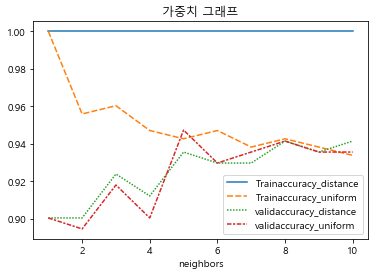

In [35]:
#n=5

#가중치 최적 값 찾기
train_accuracy2=[]; valid_accuracy2=[]
para_n=[i for i in range(1,11)]*2
para_w=(['uniform']*10)+(['distance']*10)
for (v_n_neighbors,v_weights) in zip(para_n,para_w):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy2.append(knn.score(df_train_x,df_train_y))
    valid_accuracy2.append(knn.score(df_valid_x,df_valid_y))

#가중치 스코어

df_accuracy_w = pd.DataFrame()
df_accuracy_w['neighbors']=para_n
df_accuracy_w['weight']=para_w
df_accuracy_w['Trainaccuracy']=train_accuracy2
df_accuracy_w['validaccuracy']=valid_accuracy2
display(df_accuracy_w.round(3))

#가중치 표

df_accuracy_w_pivot=df_accuracy_w.pivot(index='neighbors',columns='weight',values=['Trainaccuracy','validaccuracy'])
level0=df_accuracy_w_pivot.columns.get_level_values(0)
level1=df_accuracy_w_pivot.columns.get_level_values(1)
df_accuracy_w_pivot.columns=level0+'_'+level1
display(df_accuracy_w_pivot.head())

#가중치 그래프

plt.title('가중치 그래프')
sns.lineplot(data=df_accuracy_w_pivot)

#neightbors가 5일 때를 봤을 때 uniform의 validscore가 distance보다 높다.
#weight=uniform을 선택한다.

,neighbors,metric,TrainScore,validScore
0,1,minkowski,1.000,0.901
1,2,minkowski,0.956,0.895
2,3,minkowski,0.960,0.918
3,4,minkowski,0.947,0.901
4,5,minkowski,0.943,0.947
5,6,minkowski,0.947,0.930
6,7,minkowski,0.938,0.936
7,8,minkowski,0.943,0.942
8,9,minkowski,0.938,0.936
9,10,minkowski,0.934,0.936


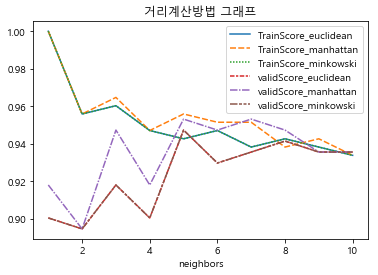

In [36]:
#최적 거리계산 방법 찾기
train_accuracy3=[]; valid_accuracy3=[]
para_n=[i for i in range(1,11)]*3
para_m=(['minkowski']*10)+(['euclidean']*10)+(['manhattan']*10)

for (v_n_neighbors,v_metric) in zip(para_n,para_m):
    knn=KNeighborsClassifier(weights='uniform',n_neighbors=v_n_neighbors,metric=v_metric)
    knn.fit(df_train_x,df_train_y)
    train_accuracy3.append(knn.score(df_train_x,df_train_y))
    valid_accuracy3.append(knn.score(df_valid_x,df_valid_y))


                       
#거리계산방법 스코어

df_accuracy_m = pd.DataFrame()
df_accuracy_m['neighbors']=para_n
df_accuracy_m['metric']=para_m
df_accuracy_m['TrainScore']=train_accuracy3
df_accuracy_m['validScore']=valid_accuracy3
display(df_accuracy_m.round(3))

#거리계산방법 그래프

plt.title('거리계산방법 그래프')
df_accuracy_m_pivot=df_accuracy_m.pivot(index='neighbors',columns='metric',values=['TrainScore','validScore'])
level0=df_accuracy_m_pivot.columns.get_level_values(0)
level1=df_accuracy_m_pivot.columns.get_level_values(1)
df_accuracy_m_pivot.columns=level0+'_'+level1
sns.lineplot(data=df_accuracy_m_pivot)


# n=5일때 맨해튼이 가장 좋다. 


In [37]:
#최종모델
knn_final=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='manhattan')
knn_final.fit(df_train_x,df_train_y)
print('accuracy on training set:{:.3f}'.format(knn_final.score(df_train_x,df_train_y)))
print('accuracy on valid set:{:.3f}'.format(knn_final.score(df_valid_x,df_valid_y)))
print('accuracy on test set:{:.3f}'.format(knn_final.score(df_test_x,df_test_y)))

y_pred=knn_final.predict(df_test_x)
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

#최종 모델을 test데이터에 대입해본 결과 설명력이 0.918로 높게 측정되었다. 
# train,valid,test를 전부 만족하는 좋은 모델이 구현되었다.

accuracy on training set:0.956
accuracy on valid set:0.953
accuracy on test set:0.918
confusion matrix:
[[98  4]
 [10 59]]
